In [6]:
#Import dependencies
import json
import tweepy
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

In [7]:
#Use Vader Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [8]:
#Call APIs
api_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__'))))))
file_name = "C:/Users/Jana/Desktop/json_keys/api_keys.json"
data = json.load(open(file_name))

consumer_key = data['twitter_consumer_key']
consumer_secret = data['twitter_consumer_secret']
access_token = data['twitter_access_token']
access_token_secret = data['twitter_access_token_secret']

In [9]:
#Authenticate Tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [10]:
#Target each news organization's Twitter feeds
target_users = ("@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

In [11]:
#Hold sentiments
sentiments = []

#Loop through tweets (100 for each news outlet, 500 tweets total)
for user in target_users:
    counter = 0
    public_tweets = api.user_timeline(user, count = 100)

    #Run Vader on tweets
    for tweet in public_tweets:

        #Run the Vader analysis on each tweet.
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        tweet_text = tweet["text"]

        #Append sentiments to list
        sentiments.append({"User" : user,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : counter,
                           "Tweet Text" : tweet_text})

        counter = counter + 1

In [12]:
#Hold sentiments in dataframe and save as csv file
news_sentiments = pd.DataFrame.from_dict(sentiments)
news_sentiments.to_csv("news_mood.csv", index=False)
news_sentiments

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,0.0000,Tue Feb 06 05:15:13 +0000 2018,0.000,1.000,0.000,Sex toys mysteriously delivered to Canadian un...,0,@BBCWorld
1,-0.4767,Tue Feb 06 04:55:39 +0000 2018,0.430,0.370,0.200,Fundraisers help girl hurt by drunk man https:...,1,@BBCWorld
2,0.2960,Tue Feb 06 04:51:43 +0000 2018,0.000,0.732,0.268,Asia markets join global stock plunge https://...,2,@BBCWorld
3,0.5859,Tue Feb 06 04:48:07 +0000 2018,0.000,0.648,0.352,Dinosaurs ‘too successful for their own good’ ...,3,@BBCWorld
4,0.0000,Tue Feb 06 03:54:43 +0000 2018,0.000,1.000,0.000,"RT @SallyBundockBBC: A ""white knuckle ride"" fo...",4,@BBCWorld
5,-0.7184,Tue Feb 06 02:52:14 +0000 2018,0.545,0.455,0.000,Seven charged over 'circus school' abuse https...,5,@BBCWorld
6,-0.5574,Tue Feb 06 02:34:36 +0000 2018,0.153,0.847,0.000,"The father of Otto Warmbier, the student who d...",6,@BBCWorld
7,0.4939,Tue Feb 06 02:30:56 +0000 2018,0.000,0.758,0.242,Winter Olympics: Friendly North Korea 'is fake...,7,@BBCWorld
8,-0.5106,Tue Feb 06 01:56:22 +0000 2018,0.309,0.480,0.210,RT @BBCNewsAsia: Maldives police have arrested...,8,@BBCWorld
9,0.0000,Tue Feb 06 01:30:35 +0000 2018,0.000,1.000,0.000,Singapore Airshow: Asia aviation in five chart...,9,@BBCWorld


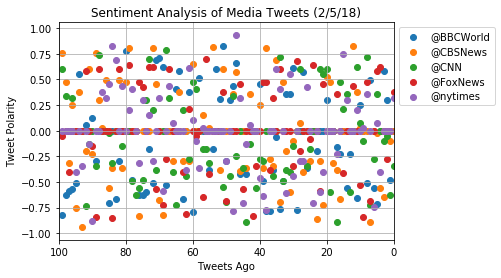

In [13]:
#Loop through tweets to create scatter plot
for user in target_users:
    df = news_sentiments.loc[news_sentiments["User"] == user]
    plt.scatter(df["Tweets Ago"], df["Compound"], label=user)

#Set up titles, labels, axes and grid
#Save plot as png
plt.xlim(100, 0)
plt.legend(bbox_to_anchor = (1,1))
plt.title("Sentiment Analysis of Media Tweets (2/5/18)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.grid()
plt.savefig("news_sentiment_analysis.png")
plt.show()

In [15]:
#Print the average sentiments scores
compound_sentiments = news_sentiments.groupby("User")["Compound"].mean()
compound_sentiments

User
@BBCWorld   -0.081203
@CBSNews    -0.012833
@CNN        -0.062621
@FoxNews     0.004607
@nytimes    -0.012507
Name: Compound, dtype: float64

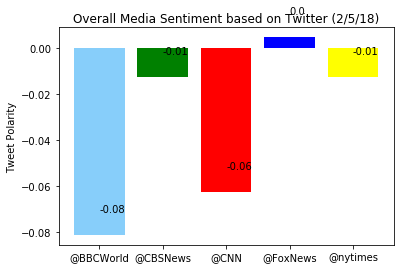

In [16]:
#Set up bar graph for average sentiments of news outlets
xlabels = compound_sentiments.index
count = 0
for sentiment in compound_sentiments:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1

#Set title, labels, axes and save as png
x_axis = np.arange(len(compound_sentiments))
plt.bar(x_axis, compound_sentiments, tick_label = xlabels, color = ['lightskyblue', "green", 'red', 'blue', 'yellow'])
plt.title("Overall Media Sentiment based on Twitter (2/5/18)")
plt.ylabel("Tweet Polarity")
plt.savefig("compound_news_sentiments.png")
plt.show()

# Observable Trends

1. Fox News is the only news outlet that had a positive sentiment today.

2. The sentiment of individual tweets is pretty evenly spread across the polarity grid, but most tweets seem to fall on the neutral line.

3. BBC World News and CNN News had relatively steeper drops in overall sentiment today compared to the other news outlets.
